# Report for BDML

## 1. Tóm tắt (abstract)

- Bài toán dự đoán giá chứng khoán là một thách thức lớn trong lĩnh vực tài chính, với ảnh hưởng lớn đến quyết định đầu tư và giao dịch. Mục tiêu của dự án này là tận dụng sức mạnh của các mô hình học máy, đặc biệt là RNN (Recurrent Neural Network) và các biến thể như LSTM (Long Short Term Memory), GRU (Gated Recurrent Unit), cùng với mô hình FFNN (Feed Forward Neural Network), để xây dựng một hệ thống dự đoán chính xác và linh hoạt cho giá chứng khoán. Việc thành công trong dự án này sẽ cung cấp thông tin quan trọng cho nhà đầu tư và người tham gia thị trường tài chính để đưa ra quyết định thông minh.

## 2.  Giới thiệu (introduction)

* Bối Cảnh: 
    Trong ngữ cảnh tài chính, quá trình dự đoán giá chứng khoán là một thách thức đặc biệt quan trọng. Nhà đầu tư và các quỹ đầu tư đều quan tâm đến khả năng dự đoán đúng xu hướng giá cổ phiếu để đưa ra quyết định giao dịch và đầu tư thông minh. Các yếu tố như tin tức, sự biến động thị trường và thông tin kinh tế toàn cầu đều tác động đến giá chứng khoán, làm cho bài toán dự đoán trở nên phức tạp.

* Bài Toán:
    Bài toán mà nhóm chúng em đang giải quyết là dự đoán giá chứng khoán dựa trên lịch sử giá. Input của chúng em bao gồm một chuỗi thời gian của giá chứng khoán và các biến động khác như chỉ số kinh tế, thông tin tài chính, và các yếu tố liên quan đến doanh nghiệp.

* Input: Lịch sử giá chứng khoán.

* Output: Dự đoán giá chứng khoán tương lai.

* Phương Pháp Giải Quyết:
    Chúng em áp dụng các mô hình học máy như RNN, LSTM, GRU, và FFNN để học mối quan hệ phức tạp giữa các yếu tố input và giá chứng khoán. Các độ đo như MAE, RMSE, MAPE, và CV(RMSE) được sử dụng để đánh giá hiệu suất của các mô hình.

* Tại Sao Quan Trọng:
    Dự đoán giá chứng khoán có ảnh hưởng trực tiếp đến quyết định đầu tư và giao dịch trong thị trường tài chính. Những dự đoán chính xác giúp nhà đầu tư và quỹ đầu tư đưa ra quyết định thông minh, tối ưu hóa lợi nhuận và giảm rủi ro. Đồng thời, nó cũng mang lại thông tin quan trọng về xu hướng thị trường và tác động của các yếu tố kinh tế, góp phần vào sự hiểu biết sâu sắc về tình hình tài chính toàn cầu.

##  3. Dữ liệu (data)

Dữ liệu: Dữ liệu chứng khoán lịch sử của các công ty, tập đoàn: Công ty cổ phần Tập đoàn Hòa Phát (HPG), Tập đoàn Vingroup (VIC), Công ty Cổ phần Sữa Việt Nam (VNM), Công ty Cổ phần Bia Sài Gòn - Miền Tây (WSB), Công ty cổ phần Đầu tư Thế giới Di động (MWG). Các tập dữ liệu có 7 trường bao gồm:

* "Date" (Ngày): Đây là trường dữ liệu chứa thông tin về ngày mà dữ liệu được thu thập hoặc ghi nhận.
* "Price" (Giá): Trường này chứa thông tin về giá đóng cửa của tài sản tài chính (ví dụ: cổ phiếu) tại ngày tương ứng.
* "Open" (Giá mở cửa): Đây là giá tài sản tài chính tại thời điểm mở cửa phiên giao dịch. Nó là giá đầu tiên của phiên giao dịch đó.
* "High" (Giá cao nhất): Trường này cho biết giá cao nhất mà tài sản tài chính đã đạt được trong suốt phiên giao dịch đó.
* "Low" (Giá thấp nhất): Đây là giá thấp nhất mà tài sản tài chính đã đạt được trong suốt phiên giao dịch đó.
* "Vol." (Khối lượng giao dịch): Trường này chứa thông tin về khối lượng giao dịch, tức là số lượng tài sản tài chính đã được giao dịch trong phiên giao dịch tương ứng.
* "Change %" (Tỷ lệ thay đổi): Trường này cho biết tỷ lệ thay đổi giữa giá đóng cửa tại ngày đó so với ngày giao dịch trước đó dưới dạng phần trăm.

### 3.1. Nhập các thư viện

In [1]:
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### 3.2. Đọc dữ liệu

In [3]:
df = pd.read_csv('../data/MWG_Historical_Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol,Change %
0,9/29/2023,"52,600","53,800","53,800","52,600",4.95M,-0.75%
1,9/28/2023,"53,000","52,900","54,700","52,500",8.91M,1.92%
2,9/27/2023,"52,000","51,100","52,000","50,200",4.90M,0.97%
3,9/26/2023,"51,500","51,100","51,700","50,500",8.27M,0.98%
4,9/25/2023,"51,000","51,600","53,000","49,900",7.69M,-2.11%


### 3.3. Chuyển dữ liệu sang kiểu số

In [34]:
data = df
data["Price"] = data["Price"].str.replace(",", "", regex=True).astype(float)
data["Open"] = data["Open"].str.replace(",", "", regex=True).astype(float)
data["High"] = data["High"].str.replace(",", "", regex=True).astype(float)
data["Low"] = data["Low"].str.replace(",", "", regex=True).astype(float)
data['Vol'] = data['Vol'].str.replace('K', 'e3').str.replace('M', 'e6').map(pd.eval).astype(float)
data["Change %"] = data["Change %"].str.rstrip("%").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2000 non-null   object 
 1   Price     2000 non-null   float64
 2   Open      2000 non-null   float64
 3   High      2000 non-null   float64
 4   Low       2000 non-null   float64
 5   Vol       2000 non-null   float64
 6   Change %  2000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


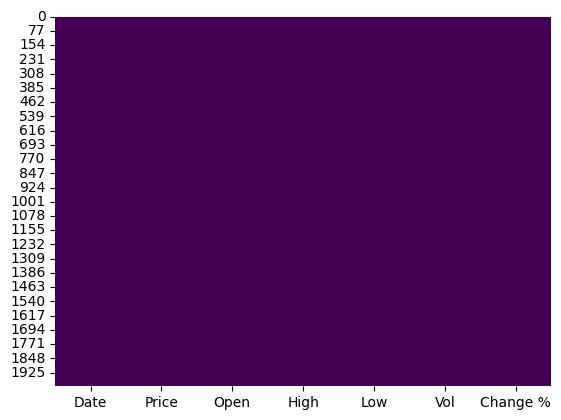

In [35]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### 3.4. Đặt index

In [36]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data.set_index('Date', inplace=True)
data.head()

,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2015-10-01,7088.0,7030.0,7088.0,6972.0,145680.0,0.83
2015-10-02,7145.0,7088.0,7145.0,7030.0,201280.0,0.80
2015-10-05,7203.0,7145.0,7203.0,7030.0,449360.0,0.81
2015-10-06,7491.0,7260.0,7606.0,7260.0,1060000.0,4.00
2015-10-07,7606.0,7606.0,7779.0,7549.0,1060000.0,1.54


### 3.5. Chuẩn hóa dữ liệu

In [23]:
def normalize_data(X_value, y_value):
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    X_scaler.fit(X_value)
    y_scaler.fit(y_value)
    X_scale_dataset = X_scaler.fit_transform(X_value)
    y_scale_dataset = y_scaler.fit_transform(y_value)

    return X_scale_dataset, y_scale_dataset, X_scaler, y_scaler

### 3.6. Lấy X - y

In [24]:
def get_X_y(X_data, y_data, n_steps_in, n_steps_out):
    X = list()
    y = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]

        if len(X_value) == n_steps_in and len(y_value) == n_steps_out:
            X.append(X_value)
            y.append(y_value)

    return np.array(X), np.array(y)

### 3.7. Chia Train - Test

In [24]:
def split_train_test(data, split_ratio = 0.8):
    train_size = round(len(data) * split_ratio)
    data_train = data[0:train_size]
    data_test = data[train_size:]

    return data_train, data_test

In [25]:
def predict_index(dataset, X_train, n_steps_in, n_steps_out):
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

In [26]:
feature = 'Open'
n_steps_in = 10
n_steps_out = 1
split_ratio = 0.8

X_value = data[[feature]]
y_value = data[['Price']]

X_scale_dataset, y_scale_dataset, X_scaler, y_scaler = normalize_data(X_value, y_value)
X, y = get_X_y(X_scale_dataset, y_scale_dataset, n_steps_in, n_steps_out)
n_features = X_value.shape[1]
X_train, X_test, = split_train_test(X, split_ratio)
y_train, y_test, = split_train_test(y, split_ratio)
index_train, index_test, = predict_index(data, X_train, n_steps_in, n_steps_out)

## 4. Phương pháp (methods)

Thuật Toán Sử Dụng Trong Dự Án:
*  Recurrent Neural Network (RNN): RNN được thiết kế để xử lý dữ liệu chuỗi thời gian bằng cách duyệt qua từng phần tử của chuỗi theo thứ tự. Mỗi bước thời gian sử dụng thông tin trước đó để ảnh hưởng đến dự đoán hiện tại.

* Long Short Term Memory (LSTM): LSTM là một biến thể của RNN giải quyết vấn đề mất mát thông tin dài hạn. Sử dụng cổng (gate) để kiểm soát việc thông tin nào được lưu trữ và thông tin nào bị quên.

* Gated Recurrent Unit (GRU): GRU cũng là biến thể của RNN giống như LSTM, nhưng với fomat cổng nhỏ gọn hơn. Giữ lại một phần thông tin quan trọng từ quá khứ.

* Feed Forward Neural Network (FFNN): FFNN là một kiến trúc mạng neuron cơ bản, thông tin chỉ di chuyển theo một hướng từ lớp đầu vào đến lớp đầu ra.
Không có chuỗi thời gian, mỗi đầu vào được xử lý độc lập.

### 4.1. Recurrent Neural Network (RNN)

In [27]:
def RNN_Model(input_dim=10, output_dim=1, feature_size=1, epochs=50, batch_size=32, activation='relu', learning_rate=0.0001, dropout_rate=0.2):
    model = Sequential()
    model.add(SimpleRNN(units=128, return_sequences=True, input_shape=(input_dim, feature_size), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units=64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    checkpoint = ModelCheckpoint('./model/RNN_Model.h5', save_best_only=True)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                verbose=2, shuffle=False, callbacks=[ checkpoint])

    return model

### 4.2. Long Short Term Memory (LSTM)

In [28]:
def LSTM_Model(input_dim=10, output_dim=1, feature_size=1, epochs=50, batch_size=32, activation='relu', learning_rate=0.0001):
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(input_dim, feature_size), activation=activation))
    model.add(LSTM(units=64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    checkpoint = ModelCheckpoint('./model/LSTM_Model.h5', save_best_only=True)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                verbose=2, shuffle=False, callbacks=[early_stopping, checkpoint])

    return model


### 4.3. Gated Recurrent Unit (GRU)

In [29]:
def GRU_Model(input_dim=10, output_dim=1, feature_size=1, epochs=50, batch_size=32, activation='relu', learning_rate=0.0001, dropout_rate = 0.2):
    model = Sequential()
    model.add(GRU(units=128, return_sequences=True, input_shape=(input_dim, feature_size), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    checkpoint = ModelCheckpoint('./model/GRU_Model.h5', save_best_only=True)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                verbose=2, shuffle=False, callbacks=[early_stopping, checkpoint])

    return model


### 4.4. Feed Forward Neural Network (FFNN)

In [30]:
def FFNN_Model(input_dim = 10, output_dim = 1, feature_size = 1, epochs = 50, batch_size = 32, activation = 'relu', learning_rate = 0.0001, dropout_rate = 0.2):
        model = Sequential()
        model.add(Dense(units=128, input_shape=(input_dim, feature_size), activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(units=64, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(32, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(units=output_dim))
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

        checkpoint = ModelCheckpoint('./model/FFNN_Model.h5', monitor='val_loss', save_best_only=True)
        
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                verbose=2, shuffle=False, callbacks=[checkpoint])

        return model


## 5. Thực nghiệm, kết quả, và thảo luận (experiments, results, and discussions)

### 5.1. Các Siêu Tham Số và Phương Pháp Đánh Giá

Các Siêu Tham Số:
* Learning Rate
* Epochs
* Batch Size
* Activation Function
* Dropout Rate

Phương Pháp Đánh Giá:
* MSE
* RMSE
* MAE
* MAPE

### 5.2. Thực Nghiệm Bằng Mô Hình RNN

#### Huấn luyện mô hình

In [31]:
model_rnn = RNN_Model(n_steps_in, n_steps_out, n_features, epochs=50, batch_size=32, activation='relu', learning_rate=0.00005)

Epoch 1/50


99/99 - 4s - loss: 0.0015 - val_loss: 0.0114 - 4s/epoch - 39ms/step
Epoch 2/50


C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 - 1s - loss: 0.0014 - val_loss: 0.0059 - 883ms/epoch - 9ms/step
Epoch 3/50
99/99 - 1s - loss: 0.0014 - val_loss: 0.0091 - 911ms/epoch - 9ms/step
Epoch 4/50
99/99 - 1s - loss: 0.0011 - val_loss: 0.0047 - 998ms/epoch - 10ms/step
Epoch 5/50
99/99 - 1s - loss: 0.0011 - val_loss: 0.0039 - 1s/epoch - 11ms/step
Epoch 6/50
99/99 - 1s - loss: 0.0010 - val_loss: 0.0063 - 937ms/epoch - 9ms/step
Epoch 7/50
99/99 - 1s - loss: 9.0234e-04 - val_loss: 0.0079 - 954ms/epoch - 10ms/step
Epoch 8/50
99/99 - 1s - loss: 8.5409e-04 - val_loss: 0.0079 - 976ms/epoch - 10ms/step
Epoch 9/50
99/99 - 1s - loss: 8.4351e-04 - val_loss: 0.0066 - 885ms/epoch - 9ms/step
Epoch 10/50
99/99 - 1s - loss: 8.4466e-04 - val_loss: 0.0068 - 912ms/epoch - 9ms/step
Epoch 11/50
99/99 - 1s - loss: 8.3583e-04 - val_loss: 0.0052 - 889ms/epoch - 9ms/step
Epoch 12/50
99/99 - 1s - loss: 8.2586e-04 - val_loss: 0.0074 - 878ms/epoch - 9ms/step
Epoch 13/50
99/99 - 1s - loss: 7.9771e-04 - val_loss: 0.0061 - 914ms/epoch - 9ms/step
Epoch 

#### Kiểm thử mô hình

In [32]:
def TestingModel(model):
    predictions = model.predict(X_test)

    return predictions

y_predict_by_RNN = TestingModel(model_rnn)

25/25 [==============================] - 1s 6ms/step


#### Đánh giá

In [33]:
def evaluate_regression_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    results_df = pd.DataFrame({
        "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "Mean Absolute Percentage Error (MAPE)"],
        "Value": [mse, rmse, mae, mape]
    })
    return results_df

resultsRNN_df = evaluate_regression_model(y_test, y_predict_by_RNN)

fullResult_df = pd.DataFrame({
    'Algorithm': ['RNN'],
    'MSE': [resultsRNN_df['Value'][0]],
    'RMSE': [resultsRNN_df['Value'][1]],
    'MAE': [resultsRNN_df['Value'][2]],
    'MAPE': [resultsRNN_df['Value'][3]]
})
resultsRNN_df


,Metric,Value
0,Mean Squared Error (MSE),0.006240
1,Root Mean Squared Error (RMSE),0.078996
2,Mean Absolute Error (MAE),0.070362
3,Mean Absolute Percentage Error (MAPE),11.145129


In [34]:
import plotly.graph_objs as go
import plotly.express as px

def plot_regression_results_plotly(predict, test, index_test, chart_title="Compare Prediction and Reality"):
    dfpredict = pd.DataFrame({'Prediction': predict.flatten()})
    dfpredict = dfpredict.set_index(index_test)
    dfactual = pd.DataFrame({'Reality': test.flatten()})
    dfactual = dfactual.set_index(index_test)

    df_result = pd.concat([dfpredict, dfactual], axis=1)

    fig = px.line(df_result, x=df_result.index, y=df_result.columns,
                  color_discrete_sequence=["red", "blue"],
                  labels={"value": "Values", "variable": "Type", "index": "Index"})

    fig.update_layout(
        title=chart_title,
        xaxis_title='Index',
        yaxis_title='Values',
        legend_title='Legend',
    )

    fig.show()

plot_regression_results_plotly(y_test, y_predict_by_RNN, index_test)

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


![Sample Image](../image/RNN.png)

### 5.3. Thực Nghiệm Bằng Mô Hình LSTM

#### Huấn luyện mô hình

In [35]:
model_lstm = LSTM_Model(n_steps_in, n_steps_out, n_features, epochs=50, batch_size=32, activation='relu', learning_rate=0.00005)

Epoch 1/50
99/99 - 6s - loss: 0.0100 - val_loss: 0.2441 - 6s/epoch - 63ms/step
Epoch 2/50


C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



99/99 - 3s - loss: 0.0061 - val_loss: 0.1700 - 3s/epoch - 34ms/step
Epoch 3/50
99/99 - 4s - loss: 0.0047 - val_loss: 0.1163 - 4s/epoch - 36ms/step
Epoch 4/50
99/99 - 3s - loss: 0.0035 - val_loss: 0.0707 - 3s/epoch - 34ms/step
Epoch 5/50
99/99 - 3s - loss: 0.0020 - val_loss: 0.0331 - 3s/epoch - 34ms/step
Epoch 6/50
99/99 - 3s - loss: 7.3233e-04 - val_loss: 0.0129 - 3s/epoch - 35ms/step
Epoch 7/50
99/99 - 3s - loss: 2.2877e-04 - val_loss: 0.0086 - 3s/epoch - 35ms/step
Epoch 8/50
99/99 - 4s - loss: 1.0524e-04 - val_loss: 0.0073 - 4s/epoch - 36ms/step
Epoch 9/50
99/99 - 3s - loss: 8.2295e-05 - val_loss: 0.0065 - 3s/epoch - 35ms/step
Epoch 10/50
99/99 - 3s - loss: 7.5047e-05 - val_loss: 0.0059 - 3s/epoch - 32ms/step
Epoch 11/50
99/99 - 3s - loss: 7.0437e-05 - val_loss: 0.0055 - 3s/epoch - 35ms/step
Epoch 12/50
99/99 - 4s - loss: 6.7898e-05 - val_loss: 0.0052 - 4s/epoch - 36ms/step
Epoch 13/50
99/99 - 3s - loss: 6.6434e-05 - val_loss: 0.0050 - 3s/epoch - 32ms/step
Epoch 14/50
99/99 - 3s - lo

#### Kiểm thử mô hình

In [36]:
y_predict_by_LSTM = TestingModel(model_lstm)

25/25 [==============================] - 1s 9ms/step


#### Đánh giá

In [37]:
resultsLSTM_df = evaluate_regression_model(y_test, y_predict_by_LSTM)

def add_result(df, df_result, name):
    result = {
        'Algorithm': name,
        'MSE': df['Value'][0],
        'RMSE': df['Value'][1],
        'MAE': df['Value'][2],
        'MAPE': df['Value'][3]
    }
    df_result.loc[len(df_result)] = result

add_result(resultsLSTM_df, fullResult_df, 'LSTM')

resultsLSTM_df

,Metric,Value
0,Mean Squared Error (MSE),0.004806
1,Root Mean Squared Error (RMSE),0.069324
2,Mean Absolute Error (MAE),0.060086
3,Mean Absolute Percentage Error (MAPE),9.804375


In [38]:
plot_regression_results_plotly(y_test, y_predict_by_LSTM, index_test)

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



![Sample Image](../image/LSTM.png)


### 5.4. Thực Nghiệm Bằng Mô Hình GRU

#### Huấn luyện mô hình

In [39]:
model_gru = GRU_Model(n_steps_in, n_steps_out, n_features, epochs=50, batch_size=32, activation='relu', learning_rate=0.00005, dropout_rate = 0.2)

Epoch 1/50
99/99 - 8s - loss: 0.0092 - val_loss: 0.2087 - 8s/epoch - 77ms/step
Epoch 2/50


C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



99/99 - 3s - loss: 0.0060 - val_loss: 0.1492 - 3s/epoch - 29ms/step
Epoch 3/50
99/99 - 3s - loss: 0.0041 - val_loss: 0.0987 - 3s/epoch - 30ms/step
Epoch 4/50
99/99 - 3s - loss: 0.0025 - val_loss: 0.0622 - 3s/epoch - 29ms/step
Epoch 5/50
99/99 - 3s - loss: 0.0016 - val_loss: 0.0427 - 3s/epoch - 28ms/step
Epoch 6/50
99/99 - 3s - loss: 0.0012 - val_loss: 0.0330 - 3s/epoch - 30ms/step
Epoch 7/50
99/99 - 3s - loss: 8.7070e-04 - val_loss: 0.0310 - 3s/epoch - 29ms/step
Epoch 8/50
99/99 - 3s - loss: 7.8495e-04 - val_loss: 0.0283 - 3s/epoch - 30ms/step
Epoch 9/50
99/99 - 3s - loss: 7.3262e-04 - val_loss: 0.0258 - 3s/epoch - 28ms/step
Epoch 10/50
99/99 - 3s - loss: 8.4496e-04 - val_loss: 0.0243 - 3s/epoch - 31ms/step
Epoch 11/50
99/99 - 3s - loss: 7.9306e-04 - val_loss: 0.0215 - 3s/epoch - 32ms/step
Epoch 12/50
99/99 - 3s - loss: 7.5450e-04 - val_loss: 0.0217 - 3s/epoch - 31ms/step
Epoch 13/50
99/99 - 3s - loss: 6.8067e-04 - val_loss: 0.0211 - 3s/epoch - 33ms/step
Epoch 14/50
99/99 - 3s - loss: 

#### Kiểm thử mô hình

In [40]:
y_predict_by_GRU = TestingModel(model_gru)

25/25 [==============================] - 1s 9ms/step


#### Đánh giá

In [41]:
resultsGRU_df =evaluate_regression_model(y_test, y_predict_by_GRU)

add_result(resultsGRU_df, fullResult_df, 'GRU')

resultsGRU_df

,Metric,Value
0,Mean Squared Error (MSE),0.015979
1,Root Mean Squared Error (RMSE),0.126407
2,Mean Absolute Error (MAE),0.106856
3,Mean Absolute Percentage Error (MAPE),15.975502


In [42]:
plot_regression_results_plotly(y_test, y_predict_by_GRU, index_test)

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



![Sample Image](../image/GRU.png)


### 5.5. Thực Nghiệm Bằng Mô Hình FFNN

#### Huấn luyện mô hình

In [43]:
model_ffnn = FFNN_Model(n_steps_in, n_steps_out, n_features, epochs=50, batch_size=32, activation='relu', learning_rate=0.00005, dropout_rate = 0.2)

Epoch 1/50
99/99 - 3s - loss: 0.0076 - val_loss: 0.1690 - 3s/epoch - 29ms/step
Epoch 2/50


C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



99/99 - 1s - loss: 0.0050 - val_loss: 0.1185 - 917ms/epoch - 9ms/step
Epoch 3/50
99/99 - 1s - loss: 0.0042 - val_loss: 0.0882 - 896ms/epoch - 9ms/step
Epoch 4/50
99/99 - 1s - loss: 0.0033 - val_loss: 0.0660 - 808ms/epoch - 8ms/step
Epoch 5/50
99/99 - 1s - loss: 0.0025 - val_loss: 0.0482 - 1s/epoch - 11ms/step
Epoch 6/50
99/99 - 1s - loss: 0.0019 - val_loss: 0.0345 - 1s/epoch - 12ms/step
Epoch 7/50
99/99 - 1s - loss: 0.0016 - val_loss: 0.0254 - 1s/epoch - 11ms/step
Epoch 8/50
99/99 - 1s - loss: 0.0013 - val_loss: 0.0200 - 974ms/epoch - 10ms/step
Epoch 9/50
99/99 - 1s - loss: 0.0012 - val_loss: 0.0169 - 882ms/epoch - 9ms/step
Epoch 10/50
99/99 - 1s - loss: 0.0011 - val_loss: 0.0150 - 971ms/epoch - 10ms/step
Epoch 11/50
99/99 - 1s - loss: 0.0011 - val_loss: 0.0139 - 899ms/epoch - 9ms/step
Epoch 12/50
99/99 - 1s - loss: 0.0010 - val_loss: 0.0133 - 790ms/epoch - 8ms/step
Epoch 13/50
99/99 - 1s - loss: 0.0010 - val_loss: 0.0126 - 859ms/epoch - 9ms/step
Epoch 14/50
99/99 - 1s - loss: 9.7768e-

#### Kiểm thử mô hình

In [52]:
y_predict_by_FFNN = TestingModel(model_ffnn)

25/25 [==============================] - 0s 3ms/step


#### Đánh giá

In [53]:
resultsFFNN_df = evaluate_regression_model(y_test, y_predict_by_FFNN[:, -1, :])

add_result(resultsFFNN_df, fullResult_df, 'FFNN')

resultsFFNN_df

,Metric,Value
0,Mean Squared Error (MSE),0.004142
1,Root Mean Squared Error (RMSE),0.064358
2,Mean Absolute Error (MAE),0.056376
3,Mean Absolute Percentage Error (MAPE),8.848158


In [46]:
plot_regression_results_plotly(y_test, y_predict_by_FFNN[:, -1, :], index_test)

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



![Sample Image](../image/FFNN.png)


In [47]:
fullResult_df

,Algorithm,MSE,RMSE,MAE,MAPE
0,RNN,0.006240,0.078996,0.070362,11.145129
1,LSTM,0.004806,0.069324,0.060086,9.804375
2,GRU,0.015979,0.126407,0.106856,15.975502
3,FFNN,0.004142,0.064358,0.056376,8.848158


In [48]:
import plotly.graph_objects as go
import pandas as pd

fullResult_df['MSE'] = fullResult_df['MSE'].round(6)
fullResult_df['RMSE'] = fullResult_df['RMSE'].round(6)
fullResult_df['MAE'] = fullResult_df['MAE'].round(6)
fullResult_df['MAPE'] = fullResult_df['MAPE'].round(6)

# Create a graph object
fig = go.Figure()

# Add RMSE column with legend
fig.add_trace(go.Bar(x=fullResult_df['Algorithm'], y=fullResult_df['MSE'], name='MSE', text=fullResult_df['MSE'], textposition='auto'))  

# Add MAE column with legend
fig.add_trace(go.Bar(x=fullResult_df['Algorithm'], y=fullResult_df['RMSE'], name='RMSE', text=fullResult_df['RMSE'], textposition='auto')) 

fig.add_trace(go.Bar(x=fullResult_df['Algorithm'], y=fullResult_df['MAE'], name='MAE', text=fullResult_df['MAE'], textposition='auto'))
fig.add_trace(go.Scatter(x=fullResult_df['Algorithm'], y=fullResult_df['MAPE'], mode='lines+markers+text', name='MAPE', yaxis='y2', text=fullResult_df['MAPE'], textposition='top center'))  # Vibrant green


# Customize the graph format
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    xaxis=dict(tickmode='array', tickvals=list(range(len(fullResult_df['Algorithm']))), ticktext=fullResult_df['Algorithm'], range=[-0.5, len(fullResult_df['Algorithm']) - 0.5]),  # Adjust the length of the x-axis
    title='MSE, RMSE, MAE and MAPE for Different Recommendation Algorithms',
    xaxis_title='Algorithm',
    yaxis_title='MSE, RMSE and MAE',
    yaxis2=dict(
        title='MAPE',
        overlaying='y',
        side='right'
    ),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.5),
    paper_bgcolor='white',  # Background color of the paper
    plot_bgcolor='white',  # Background color of the chart area
    height=600              # Set the height of the chart
)

# Display the graph
fig.show()


![Sample Image](../image/result.png)


Dựa trên kết quả trên, có thể kết luận rằng GRU là thuật toán có hiệu suất cao nhất trên tập dữ liệu kiểm thử. Điều này có thể được giải thích bằng cách GRU có khả năng học các phụ thuộc dài hạn trong dữ liệu chuỗi thời gian mà không gặp phải vấn đề vanishing gradient, giúp cải thiện khả năng dự đoán.

Nếu nhóm có thêm thời gian hoặc tài nguyên tính toán, có một số hướng nhóm có thể xem xét:
* Tinh chỉnh siêu tham số: Tối ưu hóa các siêu tham số của mô hình có thể cải thiện hiệu suất.
* Thêm tính năng: Nếu có thêm thời gian và tài nguyên, việc thêm các tính năng mới hoặc thử nghiệm với biểu diễn dữ liệu khác nhau có thể cải thiện khả năng dự đoán của mô hình.
* Kích thước mô hình: Nếu tài nguyên cho phép, có thể thử nghiệm với các kiến trúc mô hình lớn hơn để xem liệu có thể cải thiện hiệu suất không.

### 7. Phụ lục (appendices)

### RNN

* Recurrent Neural Network (RNN) là một kiểu mạng thần kinh nhân tạo được thiết kế để xử lý dữ liệu theo chuỗi. RNN làm việc tốt cho các công việc yêu cầu tuần tự, chẳng hạn như dữ liệu chuỗi thời gian, giọng nói, ngôn ngữ tự nhiên.
* Một trong những tính năng quan trọng của mạng RNN (Recurrent Neural Network). Trạng thái ẩn (hidden state) trong mỗi nơ-ron của RNN được tính toán dựa trên trạng thái ẩn của nơ-ron từ bước thời gian trước đó và dữ liệu đầu vào của thời điểm hiện tại. Điều này cho phép mạng RNN ghi nhớ thông tin từ các bước trước đó trong chuỗi dữ liệu và sử dụng nó để ảnh hưởng đến việc tính toán tại bước thời gian hiện tại. Điều này cho phép nó có khả năng ghi nhớ thông tin lịch sử và áp dụng nó cho việc dự đoán và phân tích trong tương lai.

### LSTM

* LSTM là một phương pháp học sâu, và nó là một loại kiến trúc mạng thần kinh được thiết kế cho các tác vụ mô hình hóa trình tự. LSTM được thiết kế nhằm giải quyết vấn đề do thuật toán học máy và RNN truyền thống gây ra. LSTM trở thành một công cụ mạnh mẽ trong trí tuệ nhân tạo và học sâu, tạo điều kiện cho những đột phá trong nhiều lĩnh vực khác nhau bằng cách khám phá những hiểu biết sâu sắc có giá trị từ dữ liệu tuần tự. LSTM mang lại hiệu quả cao trong việc hiểu và dự đoán các mẫu trong dữ liệu tuần tự như chuỗi thời gian, văn bản và giọng nói.

### GRU 

* GRUs (Gated Recurrent Units) là một loại kiến trúc mạng nơ-ron tái phát (recurrent neural network - RNN) có cấu trúc rất giống với LSTM (Long Short-Term Memory). Như LSTM, GRU cũng sử dụng các cổng (gates) để kiểm soát luồng dữ liệu, xử lý dữ liệu tuần tự như dữ liệu văn bản, giọng nói và chuỗi thời gian… Mặc dù là một mô hình tương đối mới so với LSTM, GRU mang đến một số cải thiện và có cấu trúc đơn giản hơn. Trong khi LSTM có cả Cell State (Ct) và hidden state (Ht), thì GRU chỉ sử dụng hidden state (Ht). Nhờ cấu trúc đơn giản này, quá trình huấn luyện của GRUs cũng nhanh hơn so với LSTM.

### FFNN

* Mạng Neural Feed Forward (FFNN) là một nhánh nhỏ của ANN, đây là một kiểu mạng thần kinh nhân tạo trong đó các kết nối giữa các nút không tạo ra bất kỳ chu kỳ nào. Đây là một dạng mạng thần kinh đơn giản nhất vì thông tin chỉ được truyền đi theo một hướng cụ thể. Mặc dù dữ liệu có thể đi qua nhiều nút ẩn, nhưng nó luôn di chuyển một cách liên tục theo một hướng duy nhất và không bao giờ quay trở lại. Trái ngược với FFNN là RNN (Recurrent Neural Network).

### 8. Đóng góp (contributions)

<table style="width:100%">
    <tr>
        <th>Nhiệm vụ</th>
        <th>Phân công</th>
    </tr>
    <tr>
        <td>Xử lý dữ liệu</td>
        <td>Tường, Nghĩa</td>
    </tr>
    <tr>
        <td>Visualize - EDA</td>
        <td>Tuấn, Vi</td>
    </tr>
    <tr>
        <td>Tìm siêu tham số tốt nhất cho mô hình RNN, LSTM</td>
        <td>Nghĩa, Tuấn</td>
    </tr>
    <tr>
        <td>Tìm siêu tham số tốt nhất cho mô hình GRU, FFNN</td>
        <td>Tường, Vi</td>
    </tr>
    <tr>
        <td>Huấn luyện mô hình với siêu tham tham số đã tìm</td>
        <td>Tuấn, Tường</td>
    </tr>
    <tr>
        <td>Tiến hành dự đoán và kiểm thử mô hình</td>
        <td>Vi, Nghĩa</td>
    </tr>
    <tr>
        <td>Đánh giá và so sánh kết quả</td>
        <td>Cả nhóm</td>
    </tr>
    <tr>
        <td>Báo cáo và trình bày kết quả</td>
        <td>Cả nhóm</td>
    </tr>
</table>


### 9. Tham khảo (references)

Saxena, S. (March 16, 2021). What is LSTM? Introduction to Long Short-Term Memory. Retrieved from https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/#h-what-is-lstm

Turing. (n.d.). Understanding Feed Forward Neural Networks With Maths and Statistics. Retrieved from Turing: https://www.turing.com/kb/mathematical-formulation-of-feed-forward-neural-network.

GeeksforGeeks. (2023). Gated Recurrent Unit Networks. Retrieved from GeeksforGeeks: https://www.geeksforgeeks.org/gated-recurrent-unit-networks/.


In [49]:
!jupyter nbconvert --to html Report.ipynb

[NbConvertApp] Converting notebook Report.ipynb to html
C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 454719 bytes to Report.html
